# Wine Quality

### Overview :
In this project we are going to detect  quality of wine.<br>
Quality greater than 6 is considered as good.<br>
I had used Random forest classifier and Gradient Boosting Classifier to predict the quality<br>
Also evaluated these on basis of different criteria using scoring metrics to find the best model

## Analyze Data

In [1]:
import pandas as pd
wine_df=pd.read_csv("redwine.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
lst=[]
for i in wine_df.index:
    if wine_df.quality[i]>=7:
        lst.append(wine_df.iloc[i].values)

In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_df.index
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [69]:
df_good=pd.DataFrame(lst)
df_good.columns=cols
df_good['Quality']='good'
df_good.drop(columns=['quality'],inplace=True,axis=1)
df_good.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
1,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
2,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,good
3,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,good
4,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,good


In [70]:
df_good.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000


In [10]:
lst2=[]
for i in wine_df.index:
    if wine_df.quality[i]<7:
        lst2.append(wine_df.iloc[i])
        
df_notgood=pd.DataFrame(lst2)

In [11]:
df_notgood['Quality']='not good'
df_notgood.drop(columns=['quality'],inplace=True,axis=1)
df_notgood.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,not good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,not good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,not good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,not good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,not good


In [68]:
df_notgood.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000


In [13]:
print(df_good.shape)
print(df_notgood.shape)

(217, 12)
(1382, 12)


In [14]:
df=pd.merge(df_notgood,df_good,how='outer')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,not good
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,not good
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,not good
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,not good
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,not good


In [15]:
df.sort_values(['alcohol'],inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
448,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,not good
474,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,not good
1236,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,not good
459,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,not good
336,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,not good


## Data Visualization


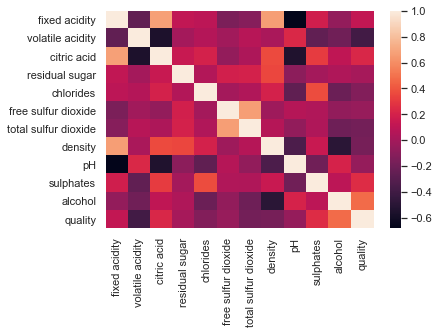

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(wine_df.corr())

#### Contents of good wine Vs not good wine

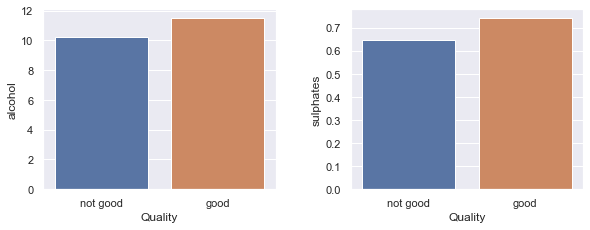

In [64]:
fig,axs=plt.subplots(1,2,figsize=(9,4))
sns.set(style='darkgrid')
sns.barplot(df.Quality,df.alcohol,ax=axs[0],ci=None)
sns.barplot(df.Quality,df['sulphates'],ax=axs[1],ci=None)
fig.tight_layout(pad=3.0)


Text(0.5, 1, 'Total sulfur dioxide')

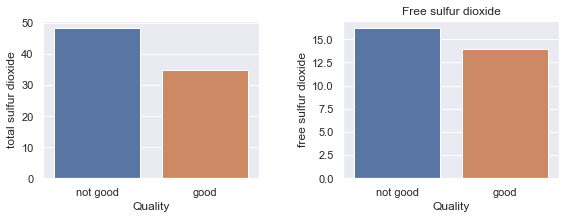

In [18]:
fig1,axs1=plt.subplots(1,2,figsize=(9,4))
sns.barplot(df.Quality,df['total sulfur dioxide'],ax=axs1[0],ci=None)
sns.barplot(df.Quality,df['free sulfur dioxide'],ax=axs1[1],ci=None)
plt.tight_layout(pad=4.0)
axs1[1].set_title("Free sulfur dioxide")
axs[0].set_title("Total sulfur dioxide")

Text(0.5, 1.0, 'Residual sugar quantity in wine')

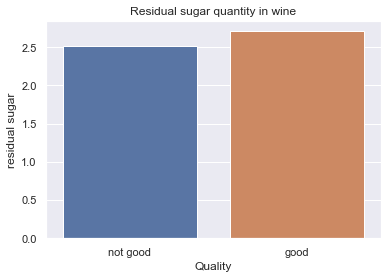

In [19]:
sns.barplot(df.Quality,df['residual sugar'],ci=None)
plt.title("Residual sugar quantity in wine")

Text(0.5, 1.0, 'Chloride quantity')

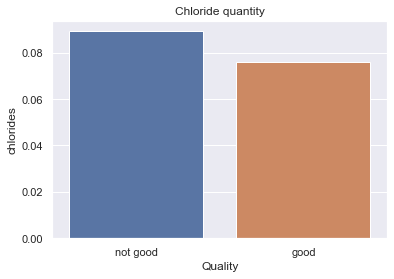

In [20]:
sns.barplot(df.Quality,df.chlorides,ci=None)
plt.title("Chloride quantity")

In [22]:
from sklearn.model_selection import train_test_split
col_x=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x=df[col_x]
y=df['Quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

#### Dummy Classifier to compare our other model's accuracy

In [23]:
from sklearn.dummy import DummyClassifier
dc=DummyClassifier(strategy='most_frequent',random_state=0)
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.885

## Decision tree classifier


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0,max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [25]:
print("Test Score ",dtc.score(x_test,y_test))
print("Train Score ",dtc.score(x_train,y_train))

Test Score  0.87
Train Score  0.8798999165971643


In [26]:
from sklearn.metrics import confusion_matrix
y_pred=dtc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 14,  32],
       [ 20, 334]], dtype=int64)

## Random Forest Classifier


In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=120,max_depth=9,random_state=0)
rfc.fit(x_train,y_train)
print("Test Score ",rfc.score(x_test,y_test))
print("Train Score ",rfc.score(x_train,y_train))

Test Score  0.9275
Train Score  0.9933277731442869


Text(0.5, 1.0, 'Feature Importance')

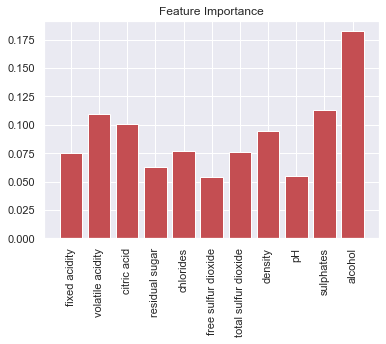

In [28]:
importance=rfc.feature_importances_
ind=np.argsort(importance)[::-1]
plt.bar(range(x.shape[1]),importance,color='r')
plt.xticks(range(x.shape[1]),col_x,rotation=90)
plt.title("Feature Importance")

In [29]:
y_pred_rfc=rfc.predict(x_test)
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
cm_rfc

array([[ 23,  23],
       [  6, 348]], dtype=int64)

Total misclassification by rfc :29

In [66]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score
y_prob_rfc=rfc.predict_proba(x_test)
score=roc_auc_score(y_test,y_prob_rfc[:,1])

In [51]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=rfc,param_grid={'n_estimators':[50,100,120,150],'max_depth':[3,5,7,9]},scoring='roc_auc')
gs.fit(x_train,y_train)
print("AUC Score ",gs.best_score_)
print(gs.best_params_)

AUC Score  0.9184534870069267
{'max_depth': 9, 'n_estimators': 120}


Text(0.5, 1.0, 'ROC Curve')

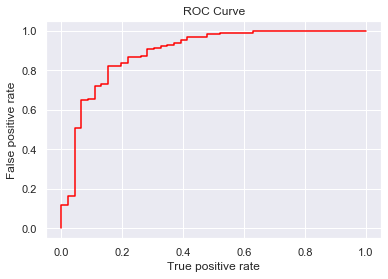

In [44]:
y_true=[]
for i in y_test.index:
    if y_test[i]=='good':
        y_true.append(1)
    else:
        y_true.append(0)
fpr,tpr,threshold=roc_curve(y_true,y_prob_rfc[:,1])
plt.plot(tpr,fpr,color='red')
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.title("ROC Curve")

## Gradient Boosted Decision Tree

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=0)
gbc.fit(x_train,y_train)
print("Accuracy Score :",gbc.score(x_test,y_test))

Accuracy Score : 0.91


In [37]:
gs2=GridSearchCV(estimator=gbc,param_grid={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[30,50,70,90,100,120],'max_depth':[3,5,7,9,10]},scoring='roc_auc')
gs2.fit(x_train,y_train)
print("ROC AUC Score :",gs2.best_score_)

ROC AUC Score : 0.9156569486425875


In [38]:
gs2.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120}

In [55]:
gbc1=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=120,random_state=0)
gbc1.fit(x_train,y_train)
print("Accuracy Score :",gbc1.score(x_test,y_test))

Accuracy Score : 0.91


In [63]:
y_pred_gbc=gbc1.predict(x_test)
cm_gbc=confusion_matrix(y_test,y_pred_gbc)
cm_gbc

array([[ 23,  23],
       [ 13, 341]], dtype=int64)

Total misclassification by gbc :36

Text(0.5, 1.0, 'ROC Curve')

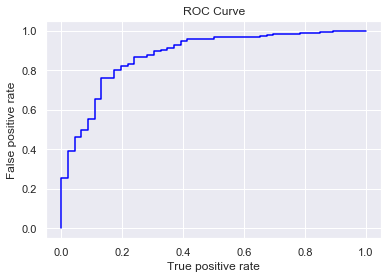

In [49]:
y_prob_gbc=gbc.predict_proba(x_test)
score=roc_auc_score(y_test,y_prob_gbc[:,1])
fpr,tpr,threshold=roc_curve(y_true,y_prob_gbc[:,1])
plt.plot(tpr,fpr,color='blue')
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.title("ROC Curve")

### Conclusion:

##### Random Forest Classifier:                                                                      
Accuracy           :0.9275<br>
Roc Auc Score  :0.9184<br>
Misclassification :29<br>

##### Gradient Boosting Classifier:
Accuracy           :0.91<br>
Roc Auc Score  :0.9156<br>
Misclassification :36<br>